## 1. Data Load

In [22]:
import os
import pandas as pd
import numpy as np
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
master_df0 = pd.read_csv('/content/drive/MyDrive/GroundTrajectory/RKPK_MasterData2.csv')
master_df0.head()

,Unnamed: 0.2,Unnamed: 0.1,x_Id,Callsign,Type,Origin,Destination,TimeSnapShot_sec_utc_,Latitude_deg_,Longitude_deg_,Altitude_ft_,Groundspeed_kt_,VerticalRate_fpm_,Course_deg_,Time_interval,Detected_Link,Progress/Node,LinkType,Unnamed: 0
0,0,0,VJC868_888134_0,VJC868,NaN,Unknown,RKPK,1.672007e+09,35.153736,128.940353,0.0,129.0,-704.0,354.0,5.0,No Detected,-,NaN,NaN
1,1,1,VJC868_888134_0,VJC868,NaN,Unknown,RKPK,1.672007e+09,35.153740,128.940350,0.0,129.0,-704.0,354.0,6.0,No Detected,-,NaN,NaN
2,2,2,VJC868_888134_0,VJC868,NaN,Unknown,RKPK,1.672007e+09,35.159230,128.939610,0.0,129.0,-704.0,354.0,5.0,No Detected,-,NaN,NaN
3,3,3,VJC868_888134_0,VJC868,NaN,Unknown,RKPK,1.672007e+09,35.162907,128.939152,0.0,130.0,-640.0,354.0,5.0,No Detected,-,NaN,NaN
4,4,4,VJC868_888134_0,VJC868,NaN,Unknown,RKPK,1.672007e+09,35.168839,128.938406,0.0,132.0,-192.0,354.0,10.0,RKPK-36L=RWY4,81.40 %,Runway,NaN


In [3]:
master_df = master_df0[[ 'x_Id', 'Callsign', 'Type', 'Origin',
                        'Destination', 'TimeSnapShot_sec_utc_', 'Latitude_deg_',
                        'Longitude_deg_', 'Altitude_ft_', 'Groundspeed_kt_',
                        'VerticalRate_fpm_', 'Course_deg_', 'Time_interval', 'Detected_Link',
                        'Progress/Node', 'LinkType']]
master_df.head()

,x_Id,Callsign,Type,Origin,Destination,TimeSnapShot_sec_utc_,Latitude_deg_,Longitude_deg_,Altitude_ft_,Groundspeed_kt_,VerticalRate_fpm_,Course_deg_,Time_interval,Detected_Link,Progress/Node,LinkType
0,VJC868_888134_0,VJC868,NaN,Unknown,RKPK,1.672007e+09,35.153736,128.940353,0.0,129.0,-704.0,354.0,5.0,No Detected,-,NaN
1,VJC868_888134_0,VJC868,NaN,Unknown,RKPK,1.672007e+09,35.153740,128.940350,0.0,129.0,-704.0,354.0,6.0,No Detected,-,NaN
2,VJC868_888134_0,VJC868,NaN,Unknown,RKPK,1.672007e+09,35.159230,128.939610,0.0,129.0,-704.0,354.0,5.0,No Detected,-,NaN
3,VJC868_888134_0,VJC868,NaN,Unknown,RKPK,1.672007e+09,35.162907,128.939152,0.0,130.0,-640.0,354.0,5.0,No Detected,-,NaN
4,VJC868_888134_0,VJC868,NaN,Unknown,RKPK,1.672007e+09,35.168839,128.938406,0.0,132.0,-192.0,354.0,10.0,RKPK-36L=RWY4,81.40 %,Runway


In [4]:
RKPK = pd.read_csv('/content/drive/MyDrive/GroundTrajectory/RKPK_Node_Link.csv')
RKPK.head()

,airport,LinkId,Node1Name,Node1Longitude,Node1Latitude,Node1Altitude,Node1Type,Node2Name,Node2Longitude,Node2Latitude,Node2Altitude,Node2Type,LinkType
0,RKPK,RKPK-G1=RP27,RKPK-G1,128.945708,35.173803,0,Gate,RKPK-RP27,128.944497,35.174252,0,Ramp,Gate
1,RKPK,RKPK-G4=RP30,RKPK-G4,128.945803,35.173028,0,Gate,RKPK-RP30,128.944600,35.173432,0,Ramp,Gate
2,RKPK,RKPK-G5=RP33,RKPK-G5,128.945900,35.172256,0,Gate,RKPK-RP33,128.944713,35.172657,0,Ramp,Gate
3,RKPK,RKPK-G8=RP36,RKPK-G8,128.945861,35.171750,0,Gate,RKPK-RP36,128.944800,35.171816,0,Ramp,Gate
4,RKPK,RKPK-G9=RP38,RKPK-G9,128.945953,35.171367,0,Gate,RKPK-RP38,128.944868,35.171323,0,Ramp,Gate


# 2. Histogram for each Link



## 2.1 __Remove__ Missing Value and Junction Node

In [234]:
master_df.LinkType.unique()

array([nan, 'Runway', 'Taxiway', 'Junction', 'Ramp', 'Gate'], dtype=object)

In [235]:
df2 = master_df.dropna(subset=['LinkType'])
df2 = df2[df2['LinkType']!='Junction']

In [236]:
## Check the number of passed link
len(df2.Detected_Link.unique())

123

## 2.2 Plot Histogram

In [237]:
rnwy = df2[df2['LinkType'] == 'Runway']
txwy = df2[df2['LinkType'] == 'Taxiway']
ramp = df2[df2['LinkType'] == 'Ramp']
gate = df2[df2['LinkType'] == 'Gate']

rnwy.head()

,x_Id,Callsign,Type,Origin,Destination,TimeSnapShot_sec_utc_,Latitude_deg_,Longitude_deg_,Altitude_ft_,Groundspeed_kt_,VerticalRate_fpm_,Course_deg_,Time_interval,Detected_Link,Progress/Node,LinkType
4,VJC868_888134_0,VJC868,NaN,Unknown,RKPK,1.672007e+09,35.168839,128.938406,0.0,132.0,-192.0,354.0,10.0,RKPK-36L=RWY4,81.40 %,Runway
5,VJC868_888134_0,VJC868,NaN,Unknown,RKPK,1.672007e+09,35.175942,128.937435,0.0,103.0,-64.0,354.0,12.0,RKPK-RWY5=RWY6,70.95 %,Runway
6,VJC868_888134_0,VJC868,NaN,Unknown,RKPK,1.672007e+09,35.178199,128.937163,0.0,82.0,0.0,352.0,10.0,RKPK-RWY6=RWY7,16.98 %,Runway
7,VJC868_888134_0,VJC868,NaN,Unknown,RKPK,1.672007e+09,35.180820,128.936830,0.0,49.0,0.0,354.0,6.0,RKPK-RWY6=RWY7,59.65 %,Runway
8,VJC868_888134_0,VJC868,NaN,Unknown,RKPK,1.672007e+09,35.182680,128.936663,0.0,26.0,0.0,0.0,13.0,RKPK-RWY6=RWY7,89.83 %,Runway


In [238]:
def SepLink(linktype):
    LinkId     = linktype.Detected_Link.unique()
    new_LinkId = [i.replace('-','_').replace('=', '_') for i in LinkId]
    type_dict = {}
    for var,link in zip(new_LinkId, LinkId):
        type_dict[var] = linktype[linktype['Detected_Link'] == link]
    
    return type_dict


In [239]:
dict_rw = SepLink(rnwy)
dict_tw = SepLink(txwy)
dict_rp = SepLink(ramp)
dict_gt = SepLink(gate)

In [240]:
key_rw = list(dict_rw.keys())
val_rw = list(dict_rw.values())

In [241]:
dict_rw[key_rw[1]].head(5)

,x_Id,Callsign,Type,Origin,Destination,TimeSnapShot_sec_utc_,Latitude_deg_,Longitude_deg_,Altitude_ft_,Groundspeed_kt_,VerticalRate_fpm_,Course_deg_,Time_interval,Detected_Link,Progress/Node,LinkType
5,VJC868_888134_0,VJC868,NaN,Unknown,RKPK,1.672007e+09,35.175942,128.937435,0.0,103.0,-64.0,354.0,12.0,RKPK-RWY5=RWY6,70.95 %,Runway
319,MT74_71BE43_0,MT74,NaN,RKPK,RKPK,1.672291e+09,35.174150,128.937680,0.0,95.0,0.0,356.0,17.0,RKPK-RWY5=RWY6,40.64 %,Runway
320,MT74_71BE43_0,MT74,NaN,RKPK,RKPK,1.672291e+09,35.176174,128.937435,0.0,105.0,0.0,354.0,5.0,RKPK-RWY5=RWY6,74.82 %,Runway
328,MT74_71BE43_0,MT74,NaN,RKPK,RKPK,1.672299e+09,35.172500,128.937900,0.0,145.0,-128.0,353.0,7.0,RKPK-RWY5=RWY6,12.75 %,Runway
329,MT74_71BE43_0,MT74,NaN,RKPK,RKPK,1.672299e+09,35.176081,128.937435,0.0,118.0,-64.0,354.0,6.0,RKPK-RWY5=RWY6,73.27 %,Runway


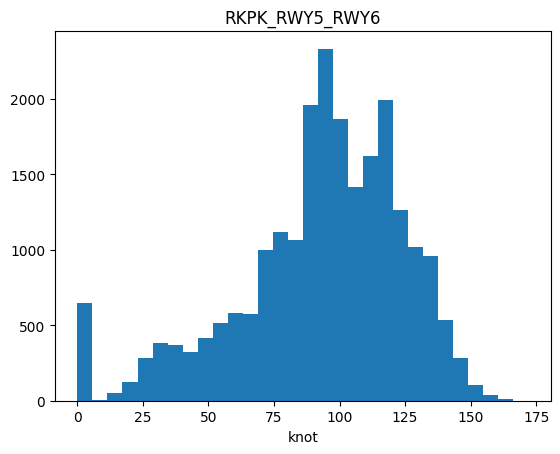

In [242]:
# rnwy_dict[key_li[1]].Groundspeed_kt_
plt.hist(dict_rw[key_rw[1]].Groundspeed_kt_,bins = 30)
plt.title(key_rw[1])
plt.xlabel('knot')
plt.show()

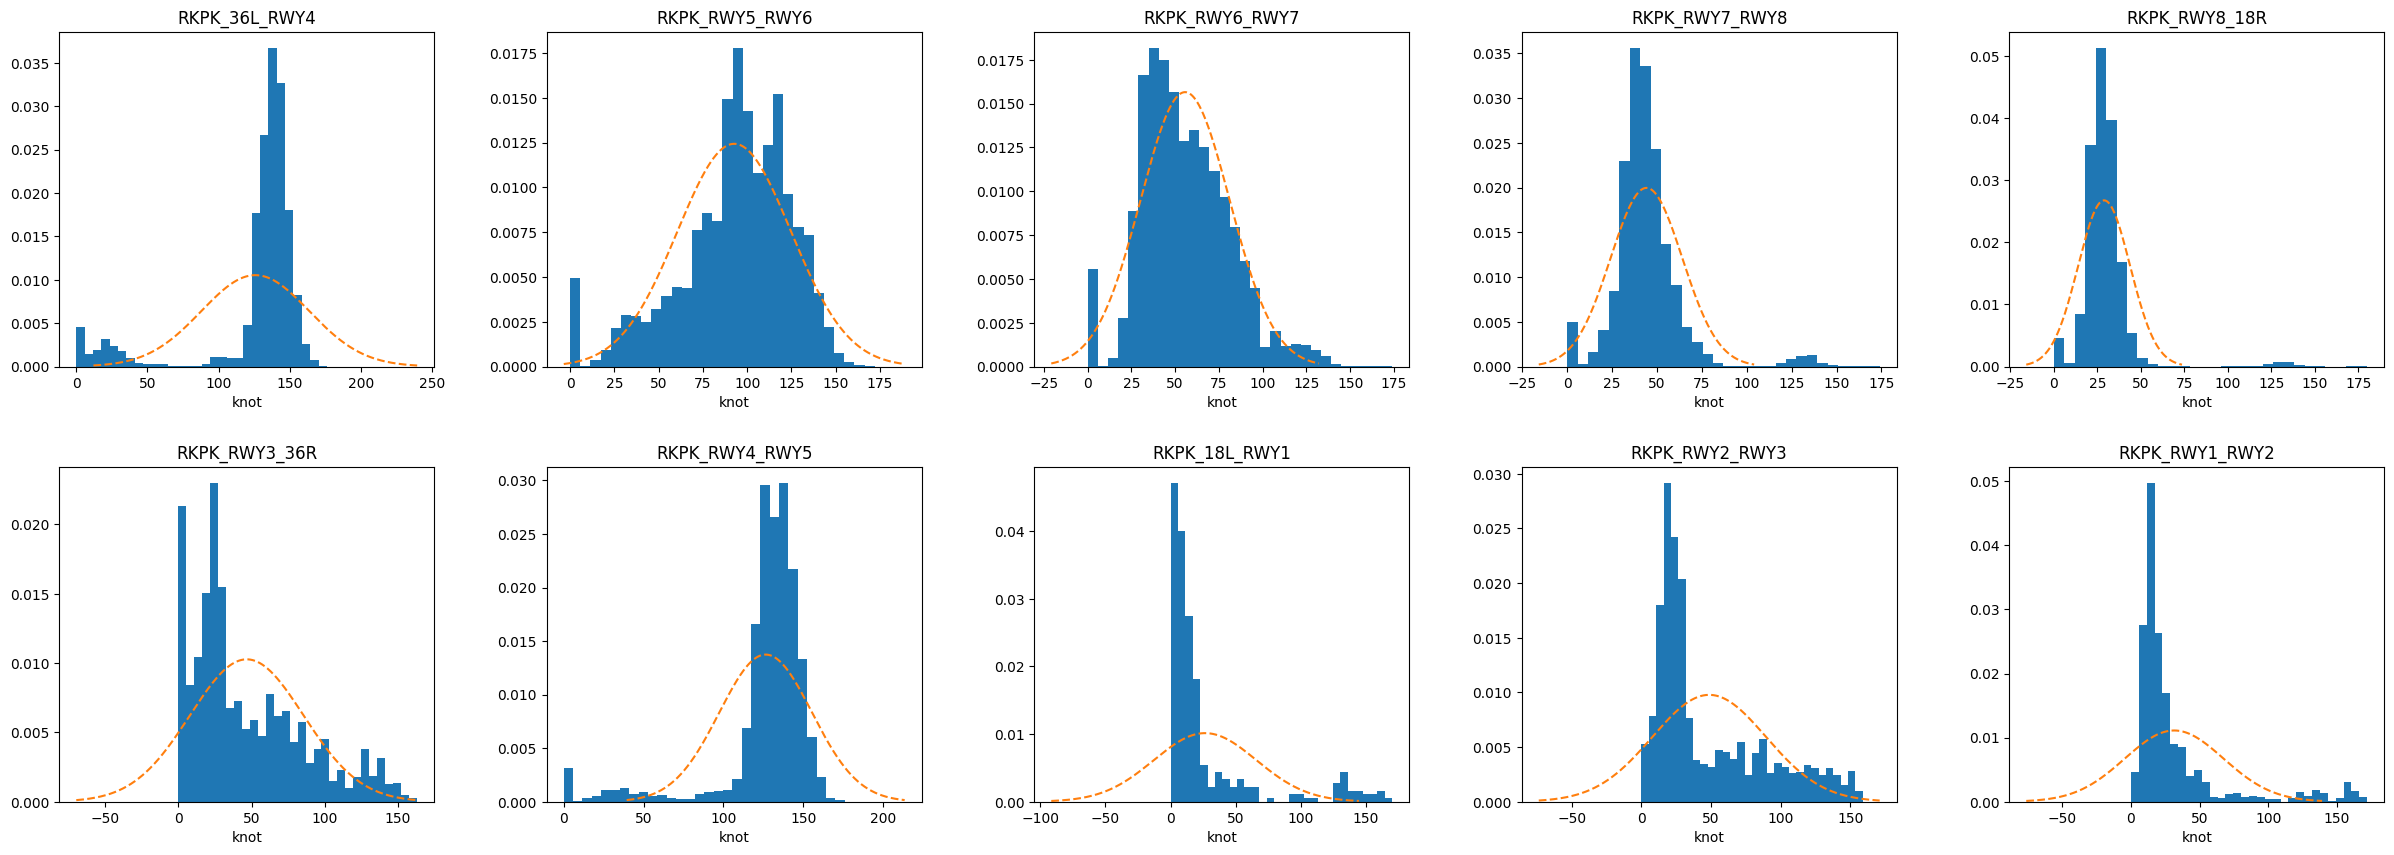

In [243]:
rows = len(dict_rw)//5
remi = len(dict_rw)%5

if remi > 0:
    rows += 1

f, axes = plt.subplots(rows, 5)
f.set_size_inches((30, 5*rows))

if remi >0:
    for ax in axes[rows-1, remi:]:
        ax.axis('off')

# 격자 여백 설정
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)


for key, i in zip(key_rw,range(len(dict_rw))):
    spd = dict_rw[key].Groundspeed_kt_
    mean = np.mean(spd)
    std = np.std(spd)

    r = (i+1)//5
    c = (i+1) % 5
    if c == 0:
        r -= 1
        c  = 4
    else:
        c -= 1

    x = np.linspace(mean - 3 * std, mean + 3 * std, 10000)
    y = norm.pdf(x,mean,std)            # 정규분포의 확률 밀도 값

    axes[r,c].hist(spd,bins = 30,density = 1)
    axes[r,c].plot(x, y, '--')
    axes[r,c].set_xlabel('knot')
    axes[r,c].set_title(key)



plt.show()

In [244]:
## make function

def plot_link(dict):

    t_key = dict.keys()

    rows = len(dict)//5
    remi = len(dict)%5

    if remi > 0:
        rows += 1

    f, axes = plt.subplots(rows, 5)
    f.set_size_inches((50, 5*rows))

    if remi >0:
        for ax in axes[rows-1, remi:]:
            ax.axis('off')

    # set white space
    plt.subplots_adjust(wspace = 0.3, hspace = 0.3)


    for key, i in zip(t_key,range(len(dict))):
        spd = dict[key].Groundspeed_kt_
        mean = np.mean(spd)
        std = np.std(spd)
        
        r = (i+1)//5
        c = (i+1) % 5
        if c == 0:
            r -= 1
            c  = 4
        else:
            c -= 1

        x = np.linspace(mean - 3 * std, mean + 3 * std, 10000)
        y = norm.pdf(x,mean,std)

        axes[r,c].hist(spd,bins = 40 ,density = 1)
        axes[r,c].plot(x, y, '--')
        axes[r,c].set_xlabel('knot')
        axes[r,c].set_title(key)

    plt.show()

    return 

/usr/local/lib/python3.10/dist-packages/scipy/stats/_distn_infrastructure.py:2093: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


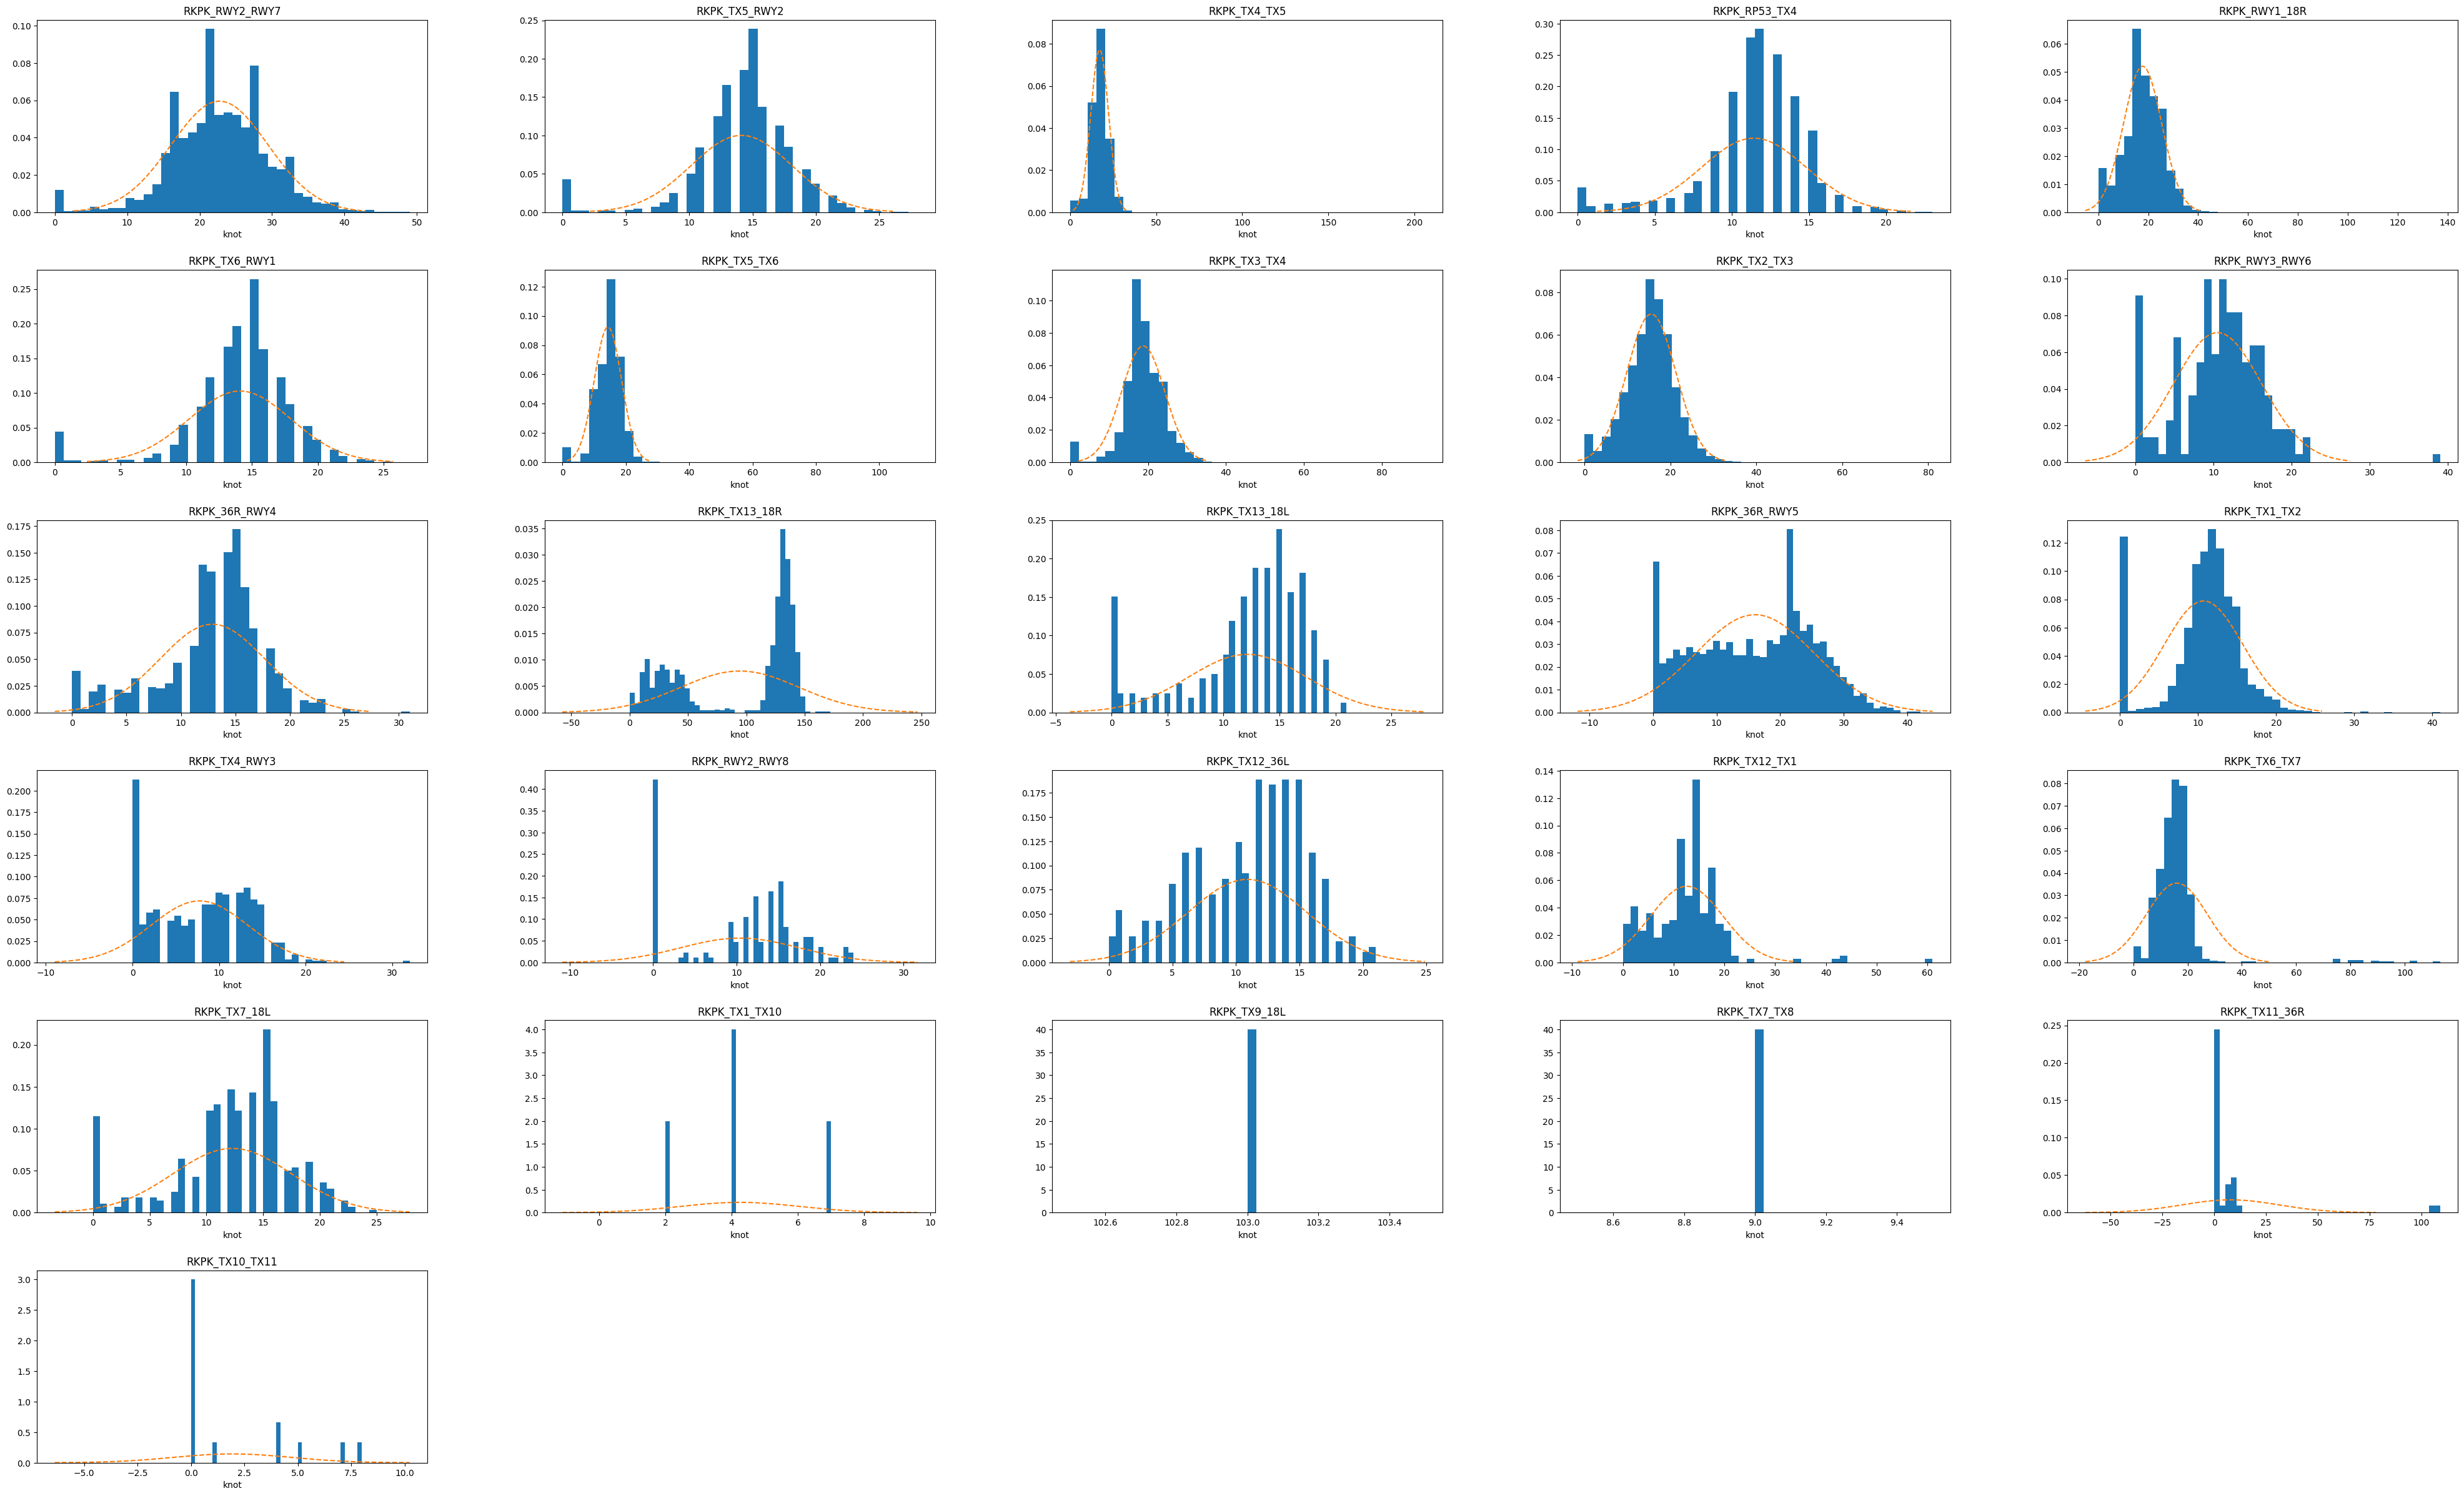

In [245]:
# distribution of Taxiway
plot_link(dict_tw)

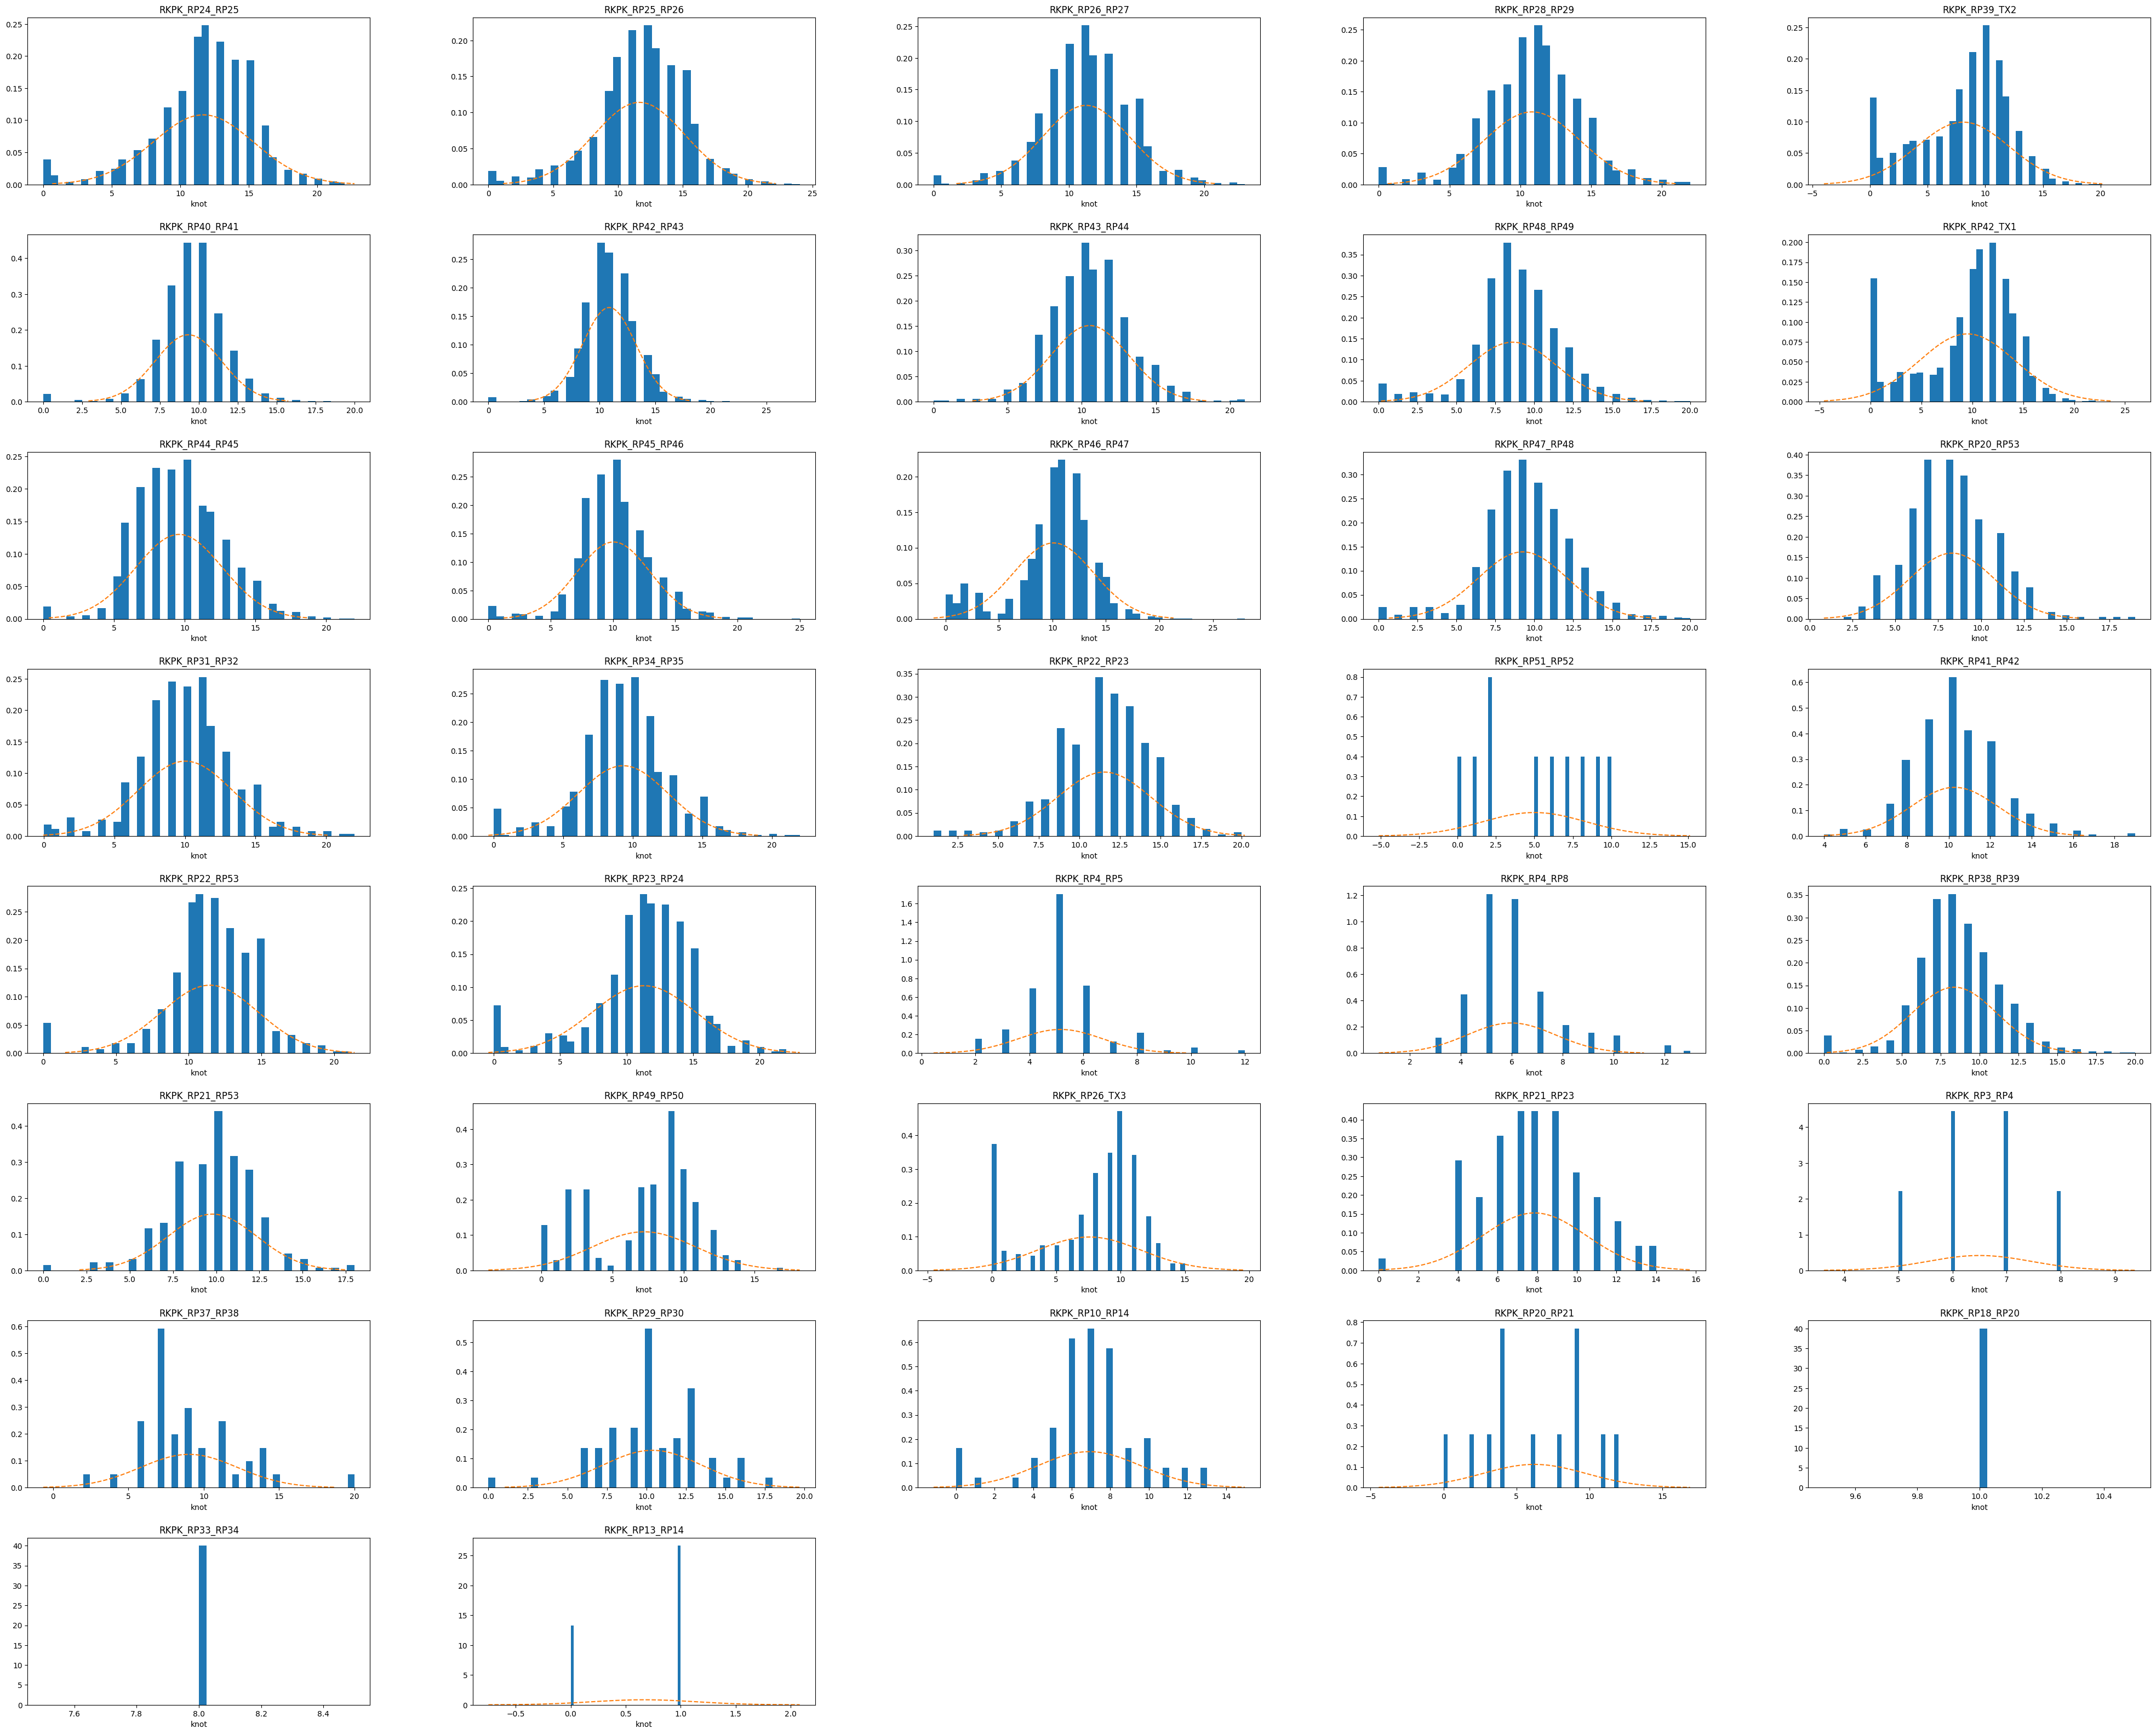

In [246]:
# distribution of Rampway
plot_link(dict_rp)

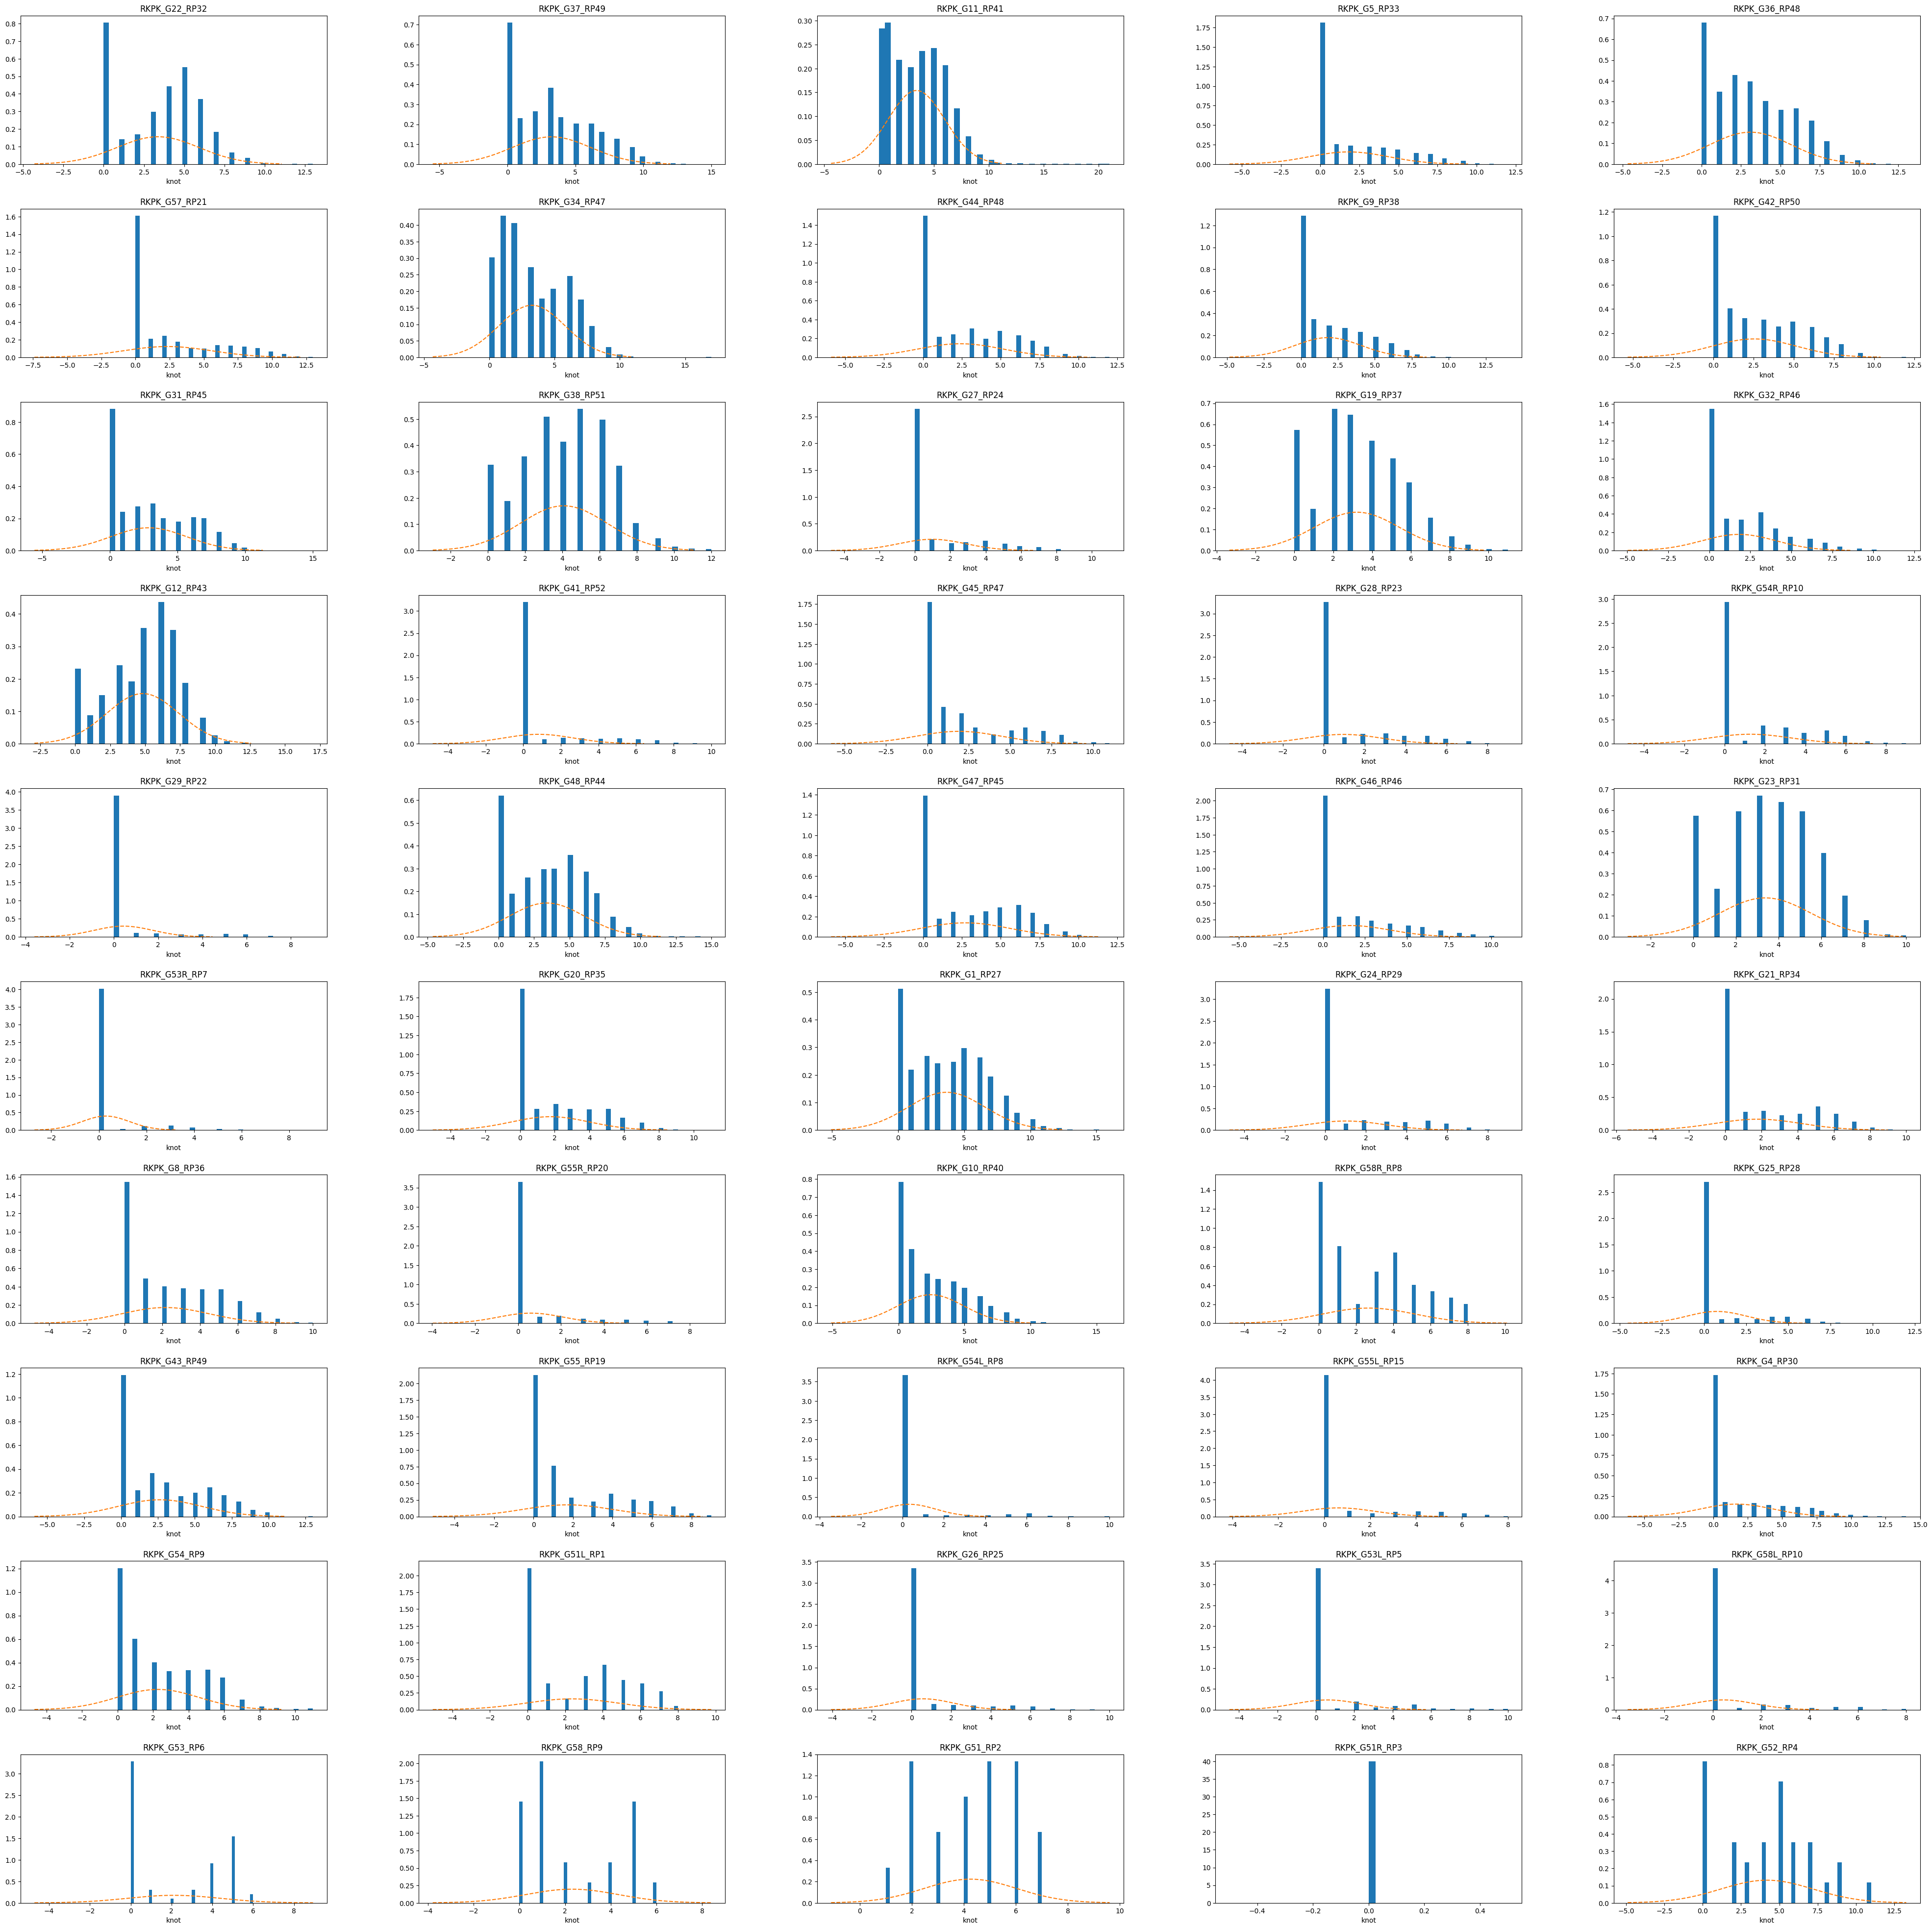

In [247]:
# distribution of gate
plot_link(dict_gt)

# 3. Frequency Table

In [248]:
key = list(dict_rw.keys())

spd = dict_rw[key[1]]['Groundspeed_kt_']
for_bin = int(max(spd)//5*5+5)
for_bins = int(for_bin//5)
freq , bins = np.histogram(spd, bins = for_bins, range = (0, for_bin))

bins_idx = [f'{i} - {i+5}' for i in range(0, int(max(bins)), 5)]
rw_hist = pd.DataFrame({key[1] :freq},index = pd.Index(bins_idx, name='bins') )
rw_hist

,RKPK_RWY5_RWY6
bins,
0 - 5,648
5 - 10,7
10 - 15,16
15 - 20,70
20 - 25,170
25 - 30,254
30 - 35,323
35 - 40,305
40 - 45,321


In [249]:
# create freq_table
def freq_table(dict_type):
    
    key = list(dict_type.keys())

    spd = dict_type[key[0]]['Groundspeed_kt_']
    for_bin = int(max(spd)//5*5+5)
    for_bins = int(for_bin//5)
    freq , bins = np.histogram(spd, bins = for_bins, range = (0, for_bin))

    bins_idx = [f'{i} - {i+5}' for i in range(0, int(max(bins)), 5)]
    freq_table = pd.DataFrame({key[0] :freq},index = pd.Index(bins_idx, name='bins') )

    

    for i in range(1,len(key)):
        spd = dict_type[key[i]]['Groundspeed_kt_']
        for_bin = int(max(spd)//5*5+5)
        for_bins = int(for_bin//5)
        freq , bins = np.histogram(spd, bins = for_bins, range = (0, for_bin))

        bins_idx = [f'{i} - {i+5}' for i in range(0, int(max(bins)), 5)]
        for_table = pd.DataFrame({key[i] :freq},index = pd.Index(bins_idx, name='bins') )

        freq_table = pd.concat([freq_table,for_table], axis = 1)
    freq_table = freq_table.fillna('-')

    
    return freq_table

In [250]:
freq_table(dict_rw)

,RKPK_36L_RWY4,RKPK_RWY5_RWY6,RKPK_RWY6_RWY7,RKPK_RWY7_RWY8,RKPK_RWY8_18R,RKPK_RWY3_36R,RKPK_RWY4_RWY5,RKPK_18L_RWY1,RKPK_RWY2_RWY3,RKPK_RWY1_RWY2
bins,,,,,,,,,,
0 - 5,316.0,648.0,900.0,386.0,320,154.0,79.0,70.0,52.0,24.0
5 - 10,87.0,7.0,2.0,6.0,14,70.0,1.0,63.0,45.0,51.0
10 - 15,89.0,16.0,22.0,53.0,155,48.0,5.0,52.0,164.0,227.0
15 - 20,158.0,70.0,138.0,166.0,1089,115.0,8.0,43.0,240.0,204.0
20 - 25,171.0,170.0,580.0,323.0,2547,140.0,16.0,18.0,250.0,97.0
25 - 30,142.0,254.0,1617.0,766.0,3087,165.0,24.0,7.0,270.0,62.0
30 - 35,107.0,323.0,2328.0,1560.0,2502,72.0,21.0,5.0,89.0,39.0
35 - 40,64.0,305.0,2464.0,2254.0,1285,49.0,27.0,6.0,52.0,41.0
40 - 45,38.0,321.0,2430.0,2224.0,517,55.0,23.0,4.0,36.0,24.0


In [251]:
freq_table(dict_tw)

,RKPK_RWY2_RWY7,RKPK_TX5_RWY2,RKPK_TX4_TX5,RKPK_RP53_TX4,RKPK_RWY1_18R,RKPK_TX6_RWY1,RKPK_TX5_TX6,RKPK_TX3_TX4,RKPK_TX2_TX3,RKPK_RWY3_RWY6,...,RKPK_RWY2_RWY8,RKPK_TX12_36L,RKPK_TX12_TX1,RKPK_TX6_TX7,RKPK_TX7_18L,RKPK_TX1_TX10,RKPK_TX9_18L,RKPK_TX7_TX8,RKPK_TX11_36R,RKPK_TX10_TX11
bins,,,,,,,,,,,,,,,,,,,,,
0 - 5,507.0,1354.0,6719,632.0,2251.0,1175.0,1945.0,1262.0,2725.0,32.0,...,39.0,36.0,36.0,19.0,47.0,3.0,0.0,0.0,26.0,12.0
5 - 10,314.0,1379.0,4522,1483.0,2530.0,1136.0,2798.0,379.0,6777.0,58.0,...,12.0,87.0,32.0,102.0,46.0,1.0,0.0,1.0,8.0,3.0
10 - 15,1359.0,16120.0,45424,8138.0,5609.0,13524.0,27838.0,4110.0,18337.0,83.0,...,44.0,144.0,87.0,233.0,185.0,-,0.0,-,3.0,-
15 - 20,6227.0,16641.0,116921,1520.0,10419.0,14967.0,29509.0,18672.0,28799.0,44.0,...,37.0,81.0,83.0,393.0,144.0,-,0.0,-,0.0,-
20 - 25,8778.0,2129.0,58898,58.0,8206.0,1466.0,4600.0,12927.0,12246.0,8.0,...,10.0,5.0,11.0,90.0,24.0,-,0.0,-,0.0,-
25 - 30,7247.0,75.0,13360,-,4472.0,39.0,321.0,4244.0,3062.0,0.0,...,-,-,1.0,7.0,1.0,-,0.0,-,0.0,-
30 - 35,3052.0,-,1475,-,1516.0,-,17.0,868.0,439.0,0.0,...,-,-,0.0,2.0,-,-,0.0,-,0.0,-
35 - 40,817.0,-,89,-,360.0,-,3.0,76.0,51.0,1.0,...,-,-,1.0,0.0,-,-,0.0,-,0.0,-
40 - 45,153.0,-,16,-,76.0,-,1.0,10.0,9.0,-,...,-,-,3.0,1.0,-,-,0.0,-,0.0,-


In [252]:
freq_table(dict_rp)

,RKPK_RP24_RP25,RKPK_RP25_RP26,RKPK_RP26_RP27,RKPK_RP28_RP29,RKPK_RP39_TX2,RKPK_RP40_RP41,RKPK_RP42_RP43,RKPK_RP43_RP44,RKPK_RP48_RP49,RKPK_RP42_TX1,...,RKPK_RP26_TX3,RKPK_RP21_RP23,RKPK_RP3_RP4,RKPK_RP37_RP38,RKPK_RP29_RP30,RKPK_RP10_RP14,RKPK_RP20_RP21,RKPK_RP18_RP20,RKPK_RP33_RP34,RKPK_RP13_RP14
bins,,,,,,,,,,,,,,,,,,,,,
0 - 5,86.0,164.0,65.0,51.0,8735.0,58.0,351,11.0,136.0,2239,...,112.0,10.0,0.0,2.0,2.0,9.0,6.0,0.0,0.0,3.0
5 - 10,311.0,758.0,645.0,386.0,14655.0,1727.0,8798,320.0,1347.0,2335,...,181.0,56.0,6.0,27.0,20.0,55.0,5.0,0.0,1.0,-
10 - 15,1049.0,2426.0,1543.0,806.0,17313.0,1543.0,25647,566.0,770.0,6634,...,201.0,22.0,-,14.0,38.0,11.0,2.0,1.0,-,-
15 - 20,371.0,794.0,383.0,159.0,1024.0,33.0,2122,65.0,39.0,1173,...,4.0,-,-,1.0,5.0,-,-,-,-,-
20 - 25,17.0,38.0,20.0,12.0,13.0,1.0,78,3.0,1.0,35,...,-,-,-,1.0,-,-,-,-,-,-
25 - 30,-,-,-,-,-,-,1,-,-,3,...,-,-,-,-,-,-,-,-,-,-


In [253]:
freq_table(dict_gt)

,RKPK_G22_RP32,RKPK_G37_RP49,RKPK_G11_RP41,RKPK_G5_RP33,RKPK_G36_RP48,RKPK_G57_RP21,RKPK_G34_RP47,RKPK_G44_RP48,RKPK_G9_RP38,RKPK_G42_RP50,...,RKPK_G54_RP9,RKPK_G51L_RP1,RKPK_G26_RP25,RKPK_G53L_RP5,RKPK_G58L_RP10,RKPK_G53_RP6,RKPK_G58_RP9,RKPK_G51_RP2,RKPK_G51R_RP3,RKPK_G52_RP4
bins,,,,,,,,,,,,,,,,,,,,,
0 - 5,1043.0,5073.0,2672,5130.0,8762.0,3832.0,1879.0,1298.0,7959.0,1641.0,...,523.0,69.0,4285.0,217.0,543.0,48.0,17.0,10.0,3.0,15.0
5 - 10,678.0,2178.0,1396,1070.0,3627.0,983.0,893.0,443.0,1378.0,572.0,...,136.0,21.0,261.0,13.0,22.0,17.0,6.0,10.0,-,15.0
10 - 15,6.0,159.0,38,28.0,102.0,204.0,13.0,16.0,27.0,9.0,...,3.0,-,1.0,1.0,-,-,-,-,-,1.0
15 - 20,-,2.0,6,-,-,-,2.0,-,-,-,...,-,-,-,-,-,-,-,-,-,-
20 - 25,-,-,2,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


# Test Code

#### Plot Test

In [ ]:
sns.histplot(spd, kde = True , edgecolor = 'none', bins = 30)

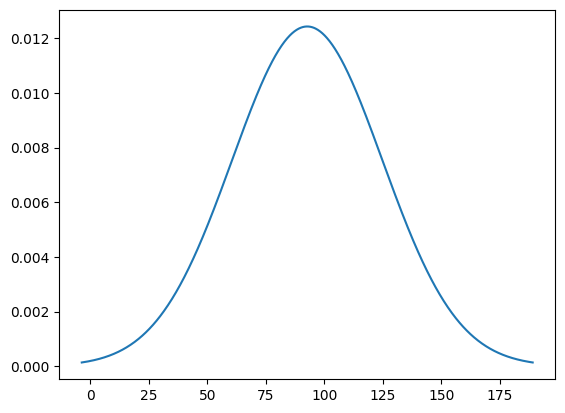

In [ ]:
plt.plot(x,y)

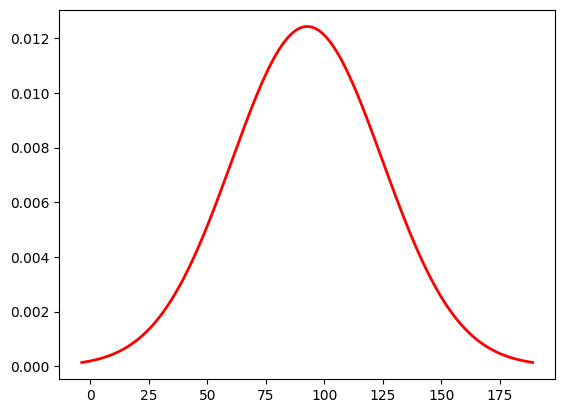

In [ ]:
mean = np.mean(spd)
std = np.std(spd)

x = np.linspace(mean - 3 * std, mean + 3 * std, len(spd))
y = (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-(x - mean) ** 2 / (2 * std ** 2))

plt.plot(x, y, color='red', linewidth=2)

In [ ]:
area

1.0000000000000002

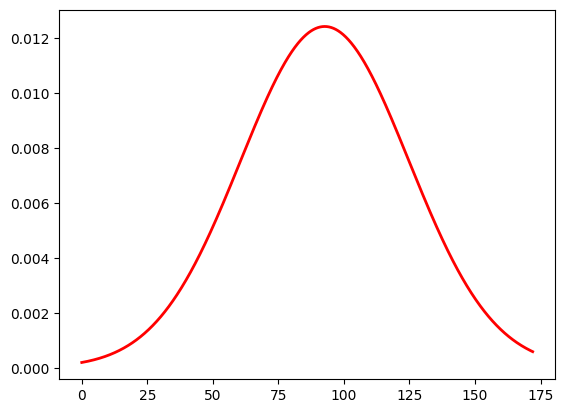

In [ ]:
plt.plot(x, y, color='red', linewidth=2)

In [ ]:
len(spd)

22843

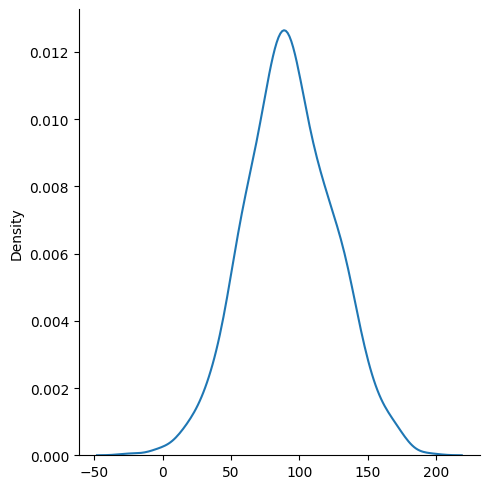

In [ ]:
sns.histplot(spd, kde = True , edgecolor = 'none', bins = 30)
sns.kdeplot(data, color='red', linewidth=2
plt.show()

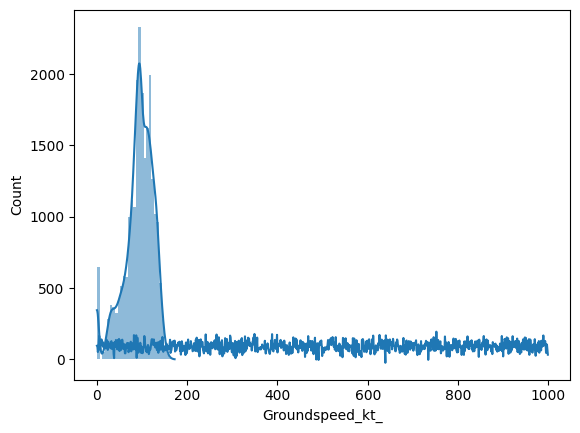

<Axes: ylabel='Density'>

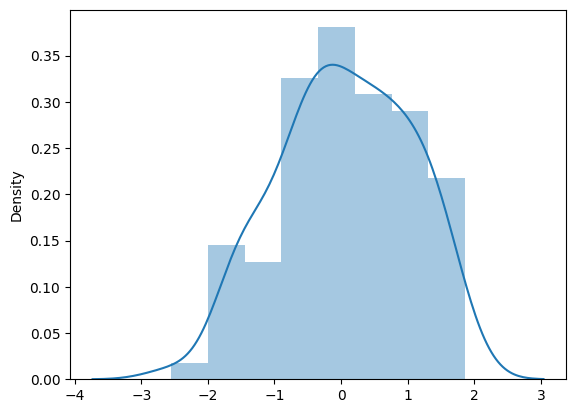

In [ ]:
data = np.random.normal(size=100)
import seaborn as sns
sns.distplot(data)

<Axes: xlabel='Groundspeed_kt_', ylabel='Count'>

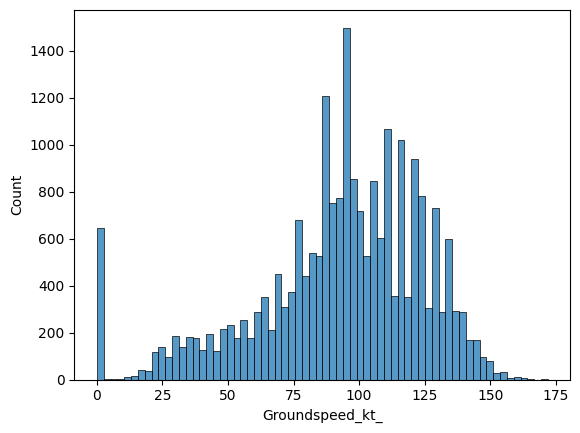

In [ ]:
sns.histplot(dict_rw[key_rw[1]].Groundspeed_kt_)

### code1:

In [ ]:
LinkId     = df2.Detected_Link.unique()
LinkId[0:3]

array(['RKPK-36L=RWY4', 'RKPK-RWY5=RWY6', 'RKPK-RWY6=RWY7'], dtype=object)

In [ ]:
len(LinkId)

123

In [ ]:
new_LinkId = [i.replace('-','_').replace('=', '_') for i in LinkId]
new_LinkId[1:3]

['RKPK_RWY5_RWY6', 'RKPK_RWY6_RWY7']

In [ ]:
type_dict = {}

f = 0
for var,link in zip(new_LinkId, LinkId):
    type_dict[var] = df2[df2['Detected_Link'] == link]
    f += 1

### test



In [ ]:
rnwy = df2[df2['LinkType'] == 'Runway']
txwy = df2[df2['LinkType'] == 'Taxiway']
ramp = df2[df2['LinkType'] == 'Ramp']
gate = df2[df2['LinkType'] == 'Gate']

In [ ]:
LinkId     = rnwy.Detected_Link.values.flatten()
new_LinkId = [i.replace('-','_').replace('=', '_') for i in LinkId]

### 2.2 Make Dictionary for each LinkType

In [ ]:
def SepLink(linktype):
    LinkId     = linktype.Detected_Link.values.flatten()
    new_LinkId = [i.replace('-','_').replace('=', '_') for i in LinkId]
    type_dict = {}
    for var,link in zip(new_LinkId, LinkId):
        type_dict[var] = linktype[linktype['Detected_Link'] == link]
    
    return type_dict


In [ ]:
    LinkId     = df2.Detected_Link.values.flatten()
    new_LinkID = df2.Detected_Link.values.flatten()

In [ ]:
td = {}

In [ ]:
td[new_LinkId[1]] = df2[df2['Detected_Link'] == LinkId[1]]

In [ ]:
df2

,Unnamed: 0.2,Unnamed: 0.1,x_Id,Callsign,Type,Origin,Destination,TimeSnapShot_sec_utc_,Latitude_deg_,Longitude_deg_,Altitude_ft_,Groundspeed_kt_,VerticalRate_fpm_,Course_deg_,Time_interval,Detected_Link,Progress/Node,LinkType,Unnamed: 0
4,4,4,VJC868_888134_0,VJC868,NaN,Unknown,RKPK,1.672007e+09,35.168839,128.938406,0.0,132.0,-192.0,354.0,10.0,RKPK-36L=RWY4,81.40 %,Runway,NaN
5,5,5,VJC868_888134_0,VJC868,NaN,Unknown,RKPK,1.672007e+09,35.175942,128.937435,0.0,103.0,-64.0,354.0,12.0,RKPK-RWY5=RWY6,70.95 %,Runway,NaN
6,6,6,VJC868_888134_0,VJC868,NaN,Unknown,RKPK,1.672007e+09,35.178199,128.937163,0.0,82.0,0.0,352.0,10.0,RKPK-RWY6=RWY7,16.98 %,Runway,NaN
7,7,7,VJC868_888134_0,VJC868,NaN,Unknown,RKPK,1.672007e+09,35.180820,128.936830,0.0,49.0,0.0,354.0,6.0,RKPK-RWY6=RWY7,59.65 %,Runway,NaN
8,8,8,VJC868_888134_0,VJC868,NaN,Unknown,RKPK,1.672007e+09,35.182680,128.936663,0.0,26.0,0.0,0.0,13.0,RKPK-RWY6=RWY7,89.83 %,Runway,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1280060,1280060,70,ABL123_71BA10_2,ABL123,NaN,Unknown,RKPK,1.670039e+09,35.172370,128.945590,0.0,3.0,0.0,113.0,5.0,RKPK-G5=RP33,68.94 %,Gate,NaN
1280061,1280061,71,ABL123_71BA10_2,ABL123,NaN,Unknown,RKPK,1.670039e+09,35.172360,128.945660,0.0,3.0,0.0,113.0,5.0,RKPK-G5=RP33,73.29 %,Gate,NaN
1280062,1280062,72,ABL123_71BA10_2,ABL123,NaN,Unknown,RKPK,1.670039e+09,35.172340,128.945710,0.0,2.0,0.0,113.0,5.0,RKPK-G5=RP33,76.77 %,Gate,NaN
1280063,1280063,73,ABL123_71BA10_2,ABL123,NaN,Unknown,RKPK,1.670039e+09,35.172330,128.945720,0.0,1.0,0.0,113.0,5.0,RKPK-G5=RP33,77.64 %,Gate,NaN


'         Unnamed: 0.2  Unnamed: 0.1              x_Id Callsign  Type   Origin  \\\n4                   4             4   VJC868_888134_0   VJC868   NaN  Unknown   \n5                   5             5   VJC868_888134_0   VJC868   NaN  Unknown   \n6                   6             6   VJC868_888134_0   VJC868   NaN  Unknown   \n7                   7             7   VJC868_888134_0   VJC868   NaN  Unknown   \n8                   8             8   VJC868_888134_0   VJC868   NaN  Unknown   \n...               ...           ...               ...      ...   ...      ...   \n1279937       1279937             2  ABL8112_71C366_5  ABL8112   NaN  Unknown   \n1279992       1279992             2   ABL123_71BA10_2   ABL123   NaN  Unknown   \n1279993       1279993             3   ABL123_71BA10_2   ABL123   NaN  Unknown   \n1279994       1279994             4   ABL123_71BA10_2   ABL123   NaN  Unknown   \n1279995       1279995             5   ABL123_71BA10_2   ABL123   NaN  Unknown   \n\n        Dest

In [ ]:
list()

[]